<a href="https://colab.research.google.com/github/aisyahaini/klasifikasi-DT/blob/main/Klasifikasi_DT_Obesity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Klasifikasi dengan Algoritma Decision Tree**


---


*   Menggunakan Dataset dari Kaggle
*   Pengujian Model dengan Confusion Matrix










In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Obesity.csv")

In [3]:
df.head(10) # checking header data

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese
5,6,50,Female,140,40,16.7,Underweight
6,7,55,Male,200,110,34.2,Obese
7,8,60,Female,130,30,13.3,Underweight
8,9,65,Male,210,120,37.2,Obese
9,10,70,Female,120,20,10.0,Underweight


In [4]:
df.shape # Small data having 200 Rows and 6 Columns

(108, 7)

In [5]:
df.info()  # checking info of columns and having zero null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


**EDA**

In [6]:
label = df["Label"].value_counts()
label


Underweight      47
Normal Weight    29
Overweight       20
Obese            12
Name: Label, dtype: int64

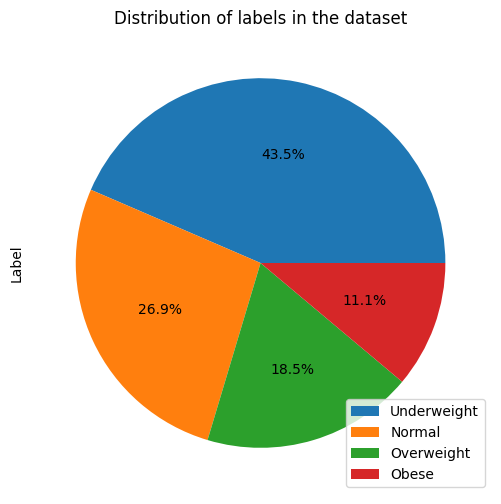

In [7]:
label.plot.pie(figsize=(6,6), title="Distribution of labels in the dataset", labels=["","","",""], autopct="%0.1f%%")
labels = ["Underweight", "Normal", "Overweight", "Obese"]
plt.legend(labels, loc=4)
plt.gca().set_aspect("equal")

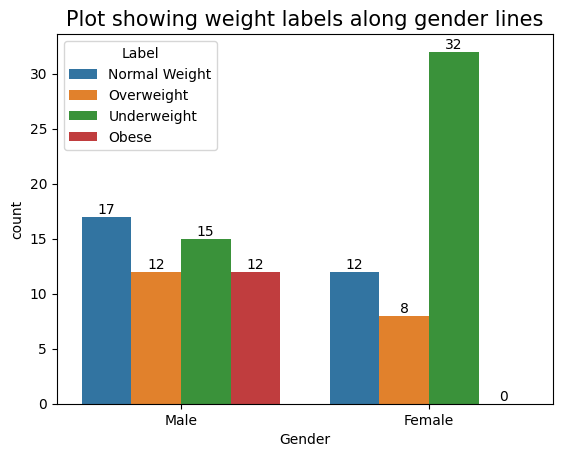

In [8]:
# plt.figure(figsize=(15,10))
ax = sns.countplot(x = df["Gender"], hue = df['Label'])
for i in ax.containers:
    ax.bar_label(i,)
plt.title("Plot showing weight labels along gender lines", size=15)
plt.show()

In [9]:
df.head(10)

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese
5,6,50,Female,140,40,16.7,Underweight
6,7,55,Male,200,110,34.2,Obese
7,8,60,Female,130,30,13.3,Underweight
8,9,65,Male,210,120,37.2,Obese
9,10,70,Female,120,20,10.0,Underweight


In [10]:
def get_label(text):
    classification = 0
    if text == "Underweight":
        classification = 1
    elif text == "Normal Weight":
        classification = 2
    elif text == "Overweight":
        classification = 3
    else:
        classification = 4
    return classification
df["weight_classification"] = df["Label"].apply(lambda label: get_label(label))

In [11]:
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label,weight_classification
0,1,25,Male,175,80,25.3,Normal Weight,2
1,2,30,Female,160,60,22.5,Normal Weight,2
2,3,35,Male,180,90,27.3,Overweight,3
3,4,40,Female,150,50,20.0,Underweight,1
4,5,45,Male,190,100,31.2,Obese,4


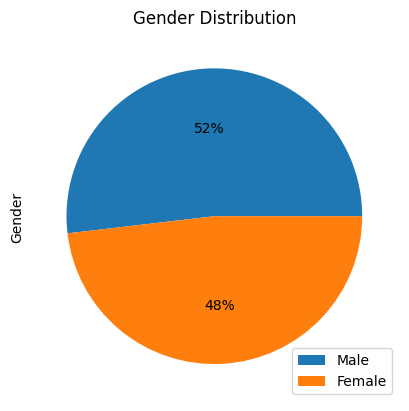

In [12]:
df["Gender"].value_counts().plot.pie(title = "Gender Distribution", labels=["", ""], autopct="%1.f%%")
labels=["Male", "Female"]
plt.legend(labels, loc=4)
plt.show()

In [13]:
def classify_gender(gender):
    classification = 0
    if gender == "Female":
        classification = 1
    else:
        classification = 2
    return classification
df["gender_classification"] = df["Gender"].apply(classify_gender)

In [14]:
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label,weight_classification,gender_classification
0,1,25,Male,175,80,25.3,Normal Weight,2,2
1,2,30,Female,160,60,22.5,Normal Weight,2,1
2,3,35,Male,180,90,27.3,Overweight,3,2
3,4,40,Female,150,50,20.0,Underweight,1,1
4,5,45,Male,190,100,31.2,Obese,4,2


In [15]:
df_corr = df.corr()
df_corr


,ID,Age,Height,Weight,BMI,weight_classification,gender_classification
ID,1.000000,-0.298257,-0.008224,-0.572625,-0.615235,-0.459655,-0.005595
Age,-0.298257,1.000000,-0.076896,0.465106,0.474185,0.451868,-0.091964
Height,-0.008224,-0.076896,1.000000,0.428890,0.354340,0.428596,0.876225
Weight,-0.572625,0.465106,0.428890,1.000000,0.972829,0.935518,0.418415
BMI,-0.615235,0.474185,0.354340,0.972829,1.000000,0.871449,0.342342
weight_classification,-0.459655,0.451868,0.428596,0.935518,0.871449,1.000000,0.405208
gender_classification,-0.005595,-0.091964,0.876225,0.418415,0.342342,0.405208,1.000000


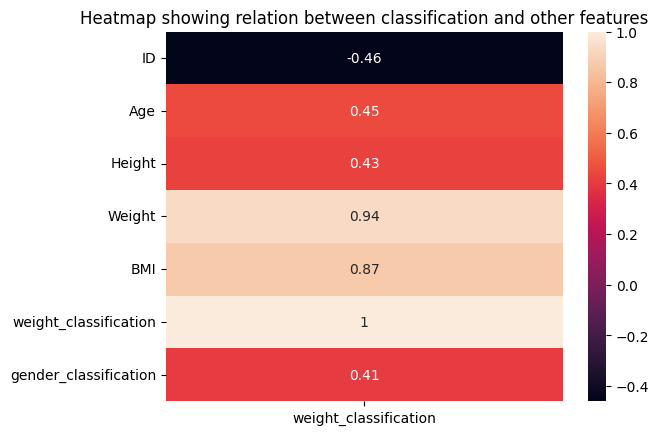

In [16]:
plt.title("Heatmap showing relation between classification and other features")
sns.heatmap(df_corr[['weight_classification']], annot = True)
plt.show()

**PENGEMBANGAN MODEL**

In [17]:
# TODO: machine learning model to predict weight classification
features = ["Age", "gender_classification", "Height", "Weight", "BMI"]
X = df[features]
y = df["weight_classification"]

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [20]:
weight_prediction = clf.predict(X_test)
weight_prediction

array([2, 2, 4, 1, 2, 3, 2, 3, 1, 1, 1, 1, 2, 1, 4, 1, 4, 3, 1, 3, 2, 4,
       3, 4, 3, 3, 3, 1, 1, 3, 1, 1, 1])

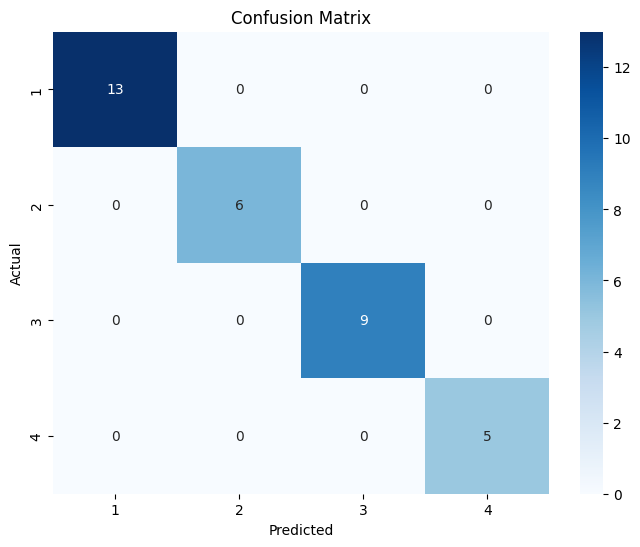

Confusion Matrix:
[[13  0  0  0]
 [ 0  6  0  0]
 [ 0  0  9  0]
 [ 0  0  0  5]]
Akurasi Model : 100.00%
Presisi Model: 100.00%
Recall Model: 100.00%
F1-score Model: 100.00%


In [30]:
# Get predictions from the classifier
y_pred = clf.predict(X_test)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using Seaborn heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

y_pred = clf.predict(X_test)
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Akurasi
accuracy = accuracy_score(y_test, y_pred)
# Presisi
precision = precision_score(y_test, y_pred, average='weighted')
# Recall
recall = recall_score(y_test, y_pred, average='weighted')
# F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

# Menampilkan hasil
print("Confusion Matrix:")
print(cm)
print(f"Akurasi Model : {accuracy:.2%}")
print(f"Presisi Model: {precision:.2%}")
print(f"Recall Model: {recall:.2%}")
print(f"F1-score Model: {f1:.2%}")

In [22]:
# Test the result of accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, weight_prediction, normalize=True)

1.0

In [23]:
# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
rf_prediction = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_prediction)


In [24]:


 #Decision Tree
dt_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_clf.fit(X_train, y_train)
dt_prediction = dt_clf.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_prediction)

# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
rf_prediction = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_prediction)

# Naive Bayes
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
nb_prediction = nb_clf.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_prediction)

# XGBoost
#xgb_clf = XGBClassifier(random_state=42)
#xgb_clf.fit(X_train, y_train)
#xgb_prediction = xgb_clf.predict(X_test)
#xgb_accuracy = accuracy_score(y_test, xgb_prediction)

# Print accuracy scores
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")
#print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")

Decision Tree Accuracy: 1.0000
Random Forest Accuracy: 1.0000
Naive Bayes Accuracy: 0.7879


In [25]:
# Test the result of accuracy 1
from sklearn.metrics import accuracy_score
accuracy_score(y_test, weight_prediction, normalize=True)

1.0

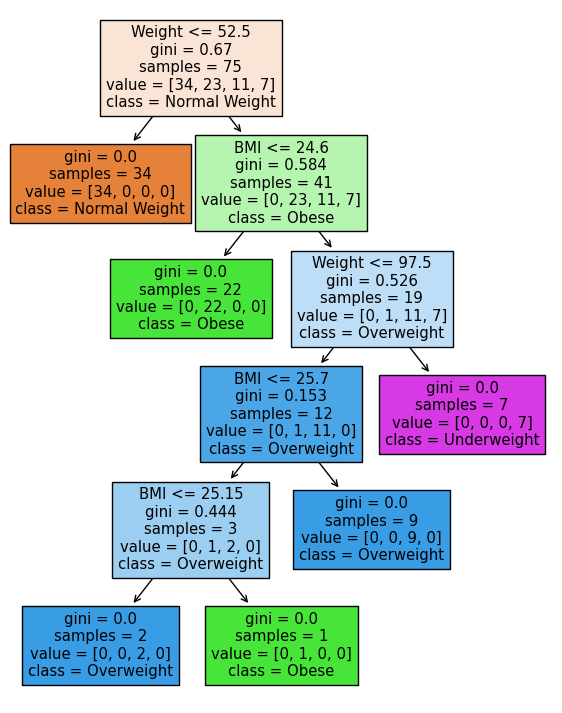

In [26]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
plt.figure(figsize = (7,9),dpi = 100)
plot_tree(clf,feature_names=X.columns, class_names = sorted(df["Label"].unique()), filled=True);

In [27]:
clf.predict([['34', '1', '187', '95' ,'25']])

array([3])